# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

## Importing Data

In [3]:
application_data = pd.read_csv('Dataset/application_data.csv')
previous_application = pd.read_csv('Dataset/previous_application.csv')
columns_description = pd.read_csv('Dataset/columns_description.csv',skiprows=1)

## Data Dimensions

In [4]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)
print ("columns_description  :",columns_description.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)
columns_description  : (159, 5)


## First Few rows of Data

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(3))

'application_data'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
display("previous_application ")
display(previous_application.head(3))

'previous_application '

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [7]:
display("columns_description")
pd.set_option('display.max_colwidth',0)
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

,application_data,SK_ID_CURR,ID of loan in our sample,Unnamed: 4
0,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
1,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
2,application_data,CODE_GENDER,Gender of the client,NaN
3,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
4,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
5,application_data,CNT_CHILDREN,Number of children the client has,NaN
6,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
7,application_data,AMT_CREDIT,Credit amount of the loan,NaN
8,application_data,AMT_ANNUITY,Loan annuity,NaN
9,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN


## % of Missing values in previous_application

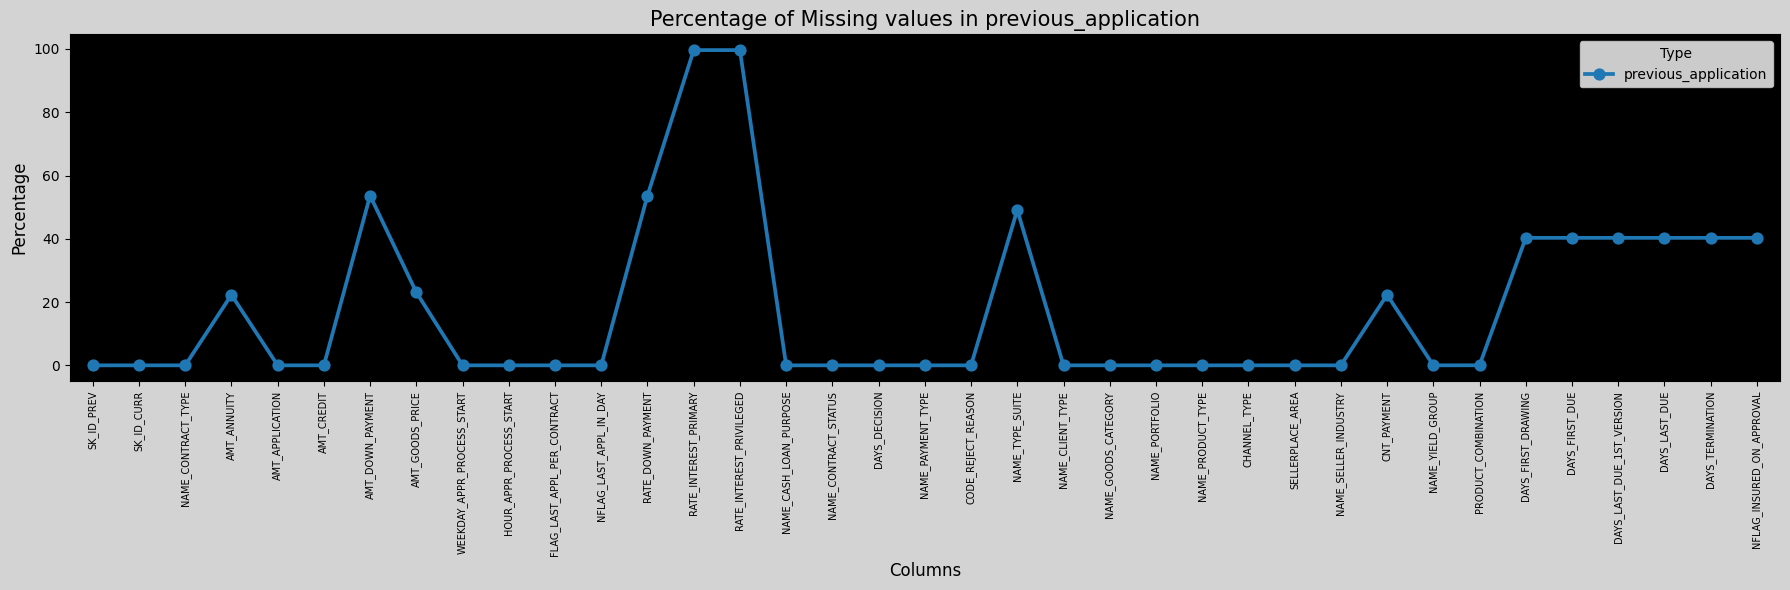

In [8]:
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application.columns = ["column", "percentage"]
miss_previous_application["type"] = "previous_application"


fig, ax = plt.subplots(figsize=(18, 6))
sns.pointplot(x="column", y="percentage", data=miss_previous_application, hue="type", ax=ax)


plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in previous_application", fontsize=15)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Columns", fontsize=12)
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.legend(title='Type', loc='upper right')
plt.tight_layout()

plt.show()


In [9]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
N

### Removing columns with missing values more than 50%
Key Point to be noted is that, as per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector. So we can drop those columns which surpass the limit.

In [10]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',"RATE_INTEREST_PRIVILEGED"],axis=1)

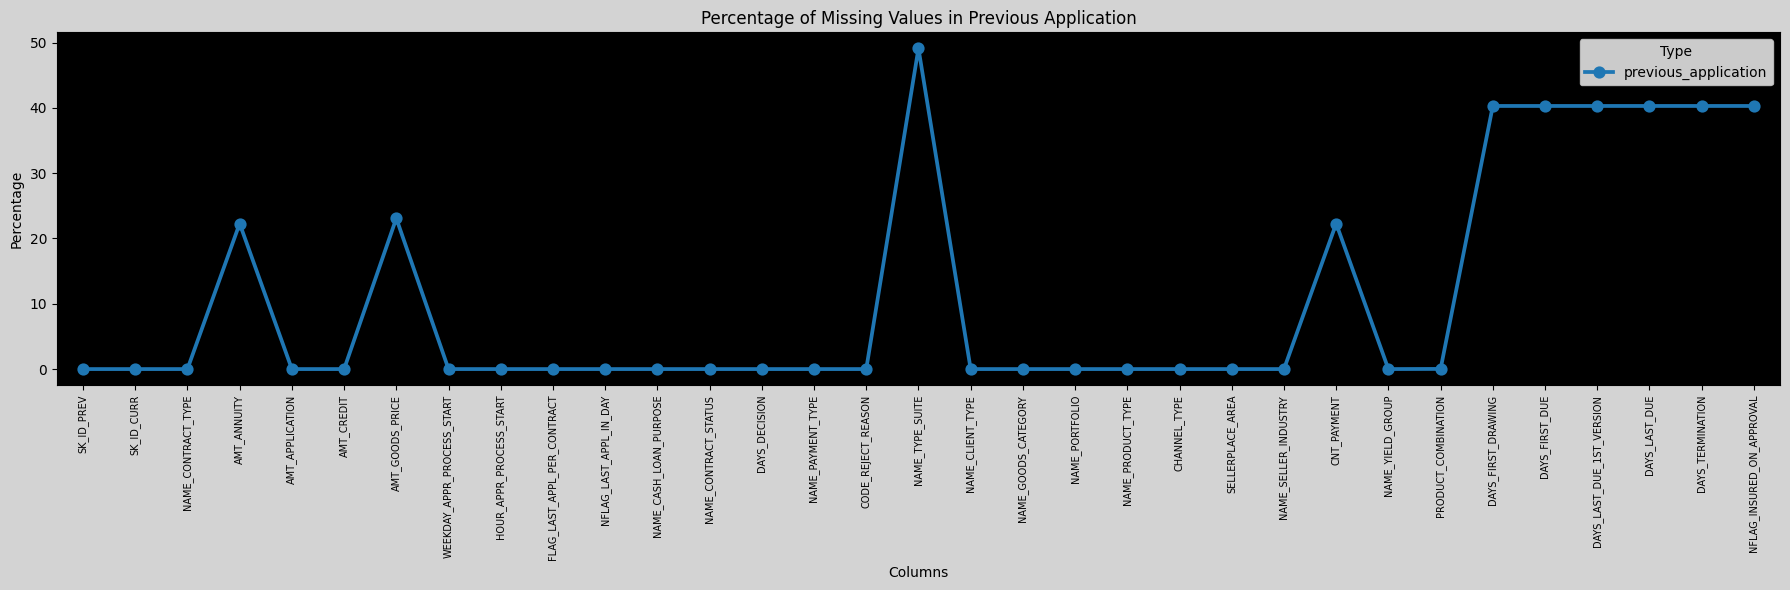

In [11]:
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application.columns = ["column", "percentage"]
miss_previous_application["type"] = "previous_application"

fig = plt.figure(figsize=(18, 6))
ax = sns.pointplot(x="column", y="percentage", data=miss_previous_application, hue="type")

plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Previous Application")
plt.ylabel("Percentage")
plt.xlabel("Columns")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.legend(title='Type', loc='upper right')
plt.tight_layout()

plt.show()


In [12]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
NAME_SELLER_INDUSTRY           0.00 
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP               0.00 
PRODUCT_COMBINATION            0.02 
D

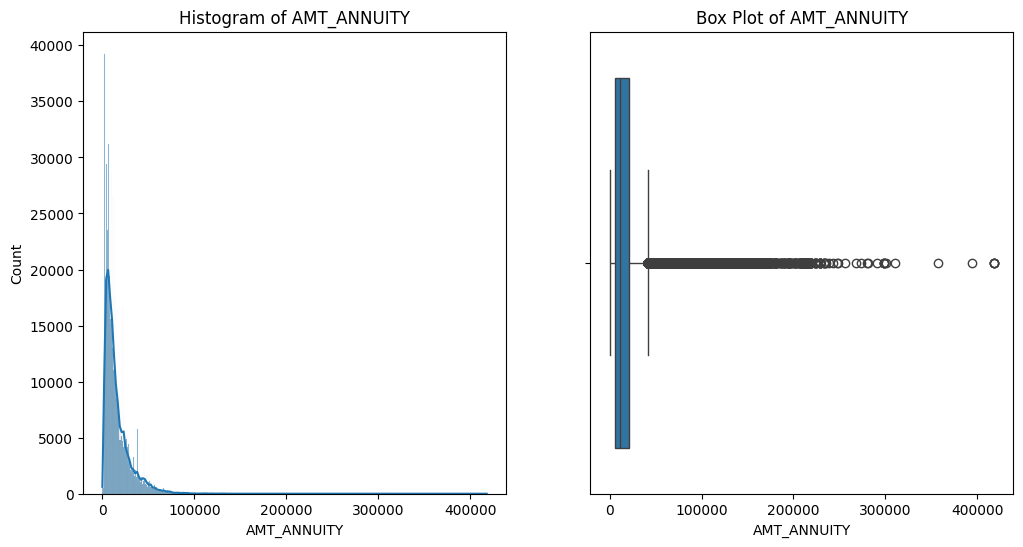

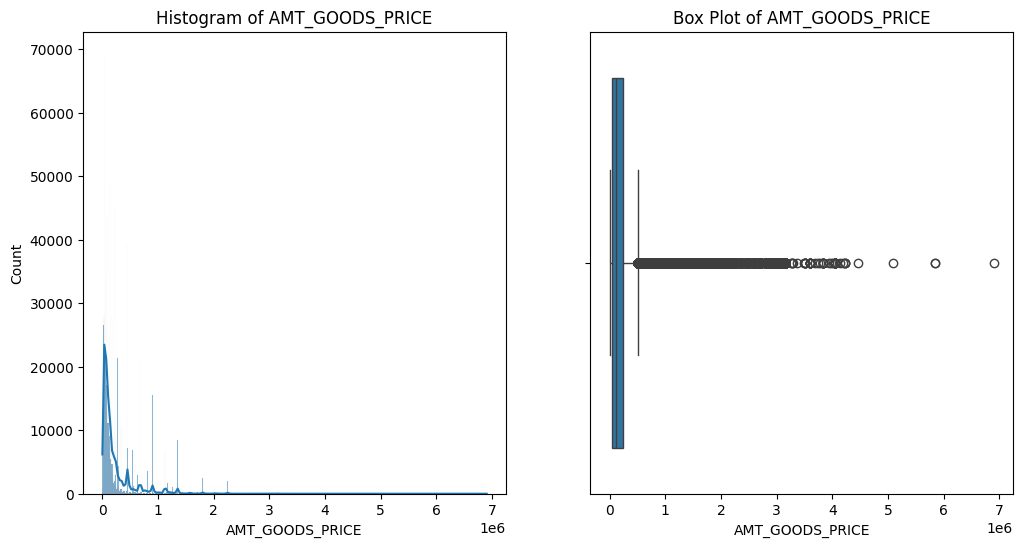

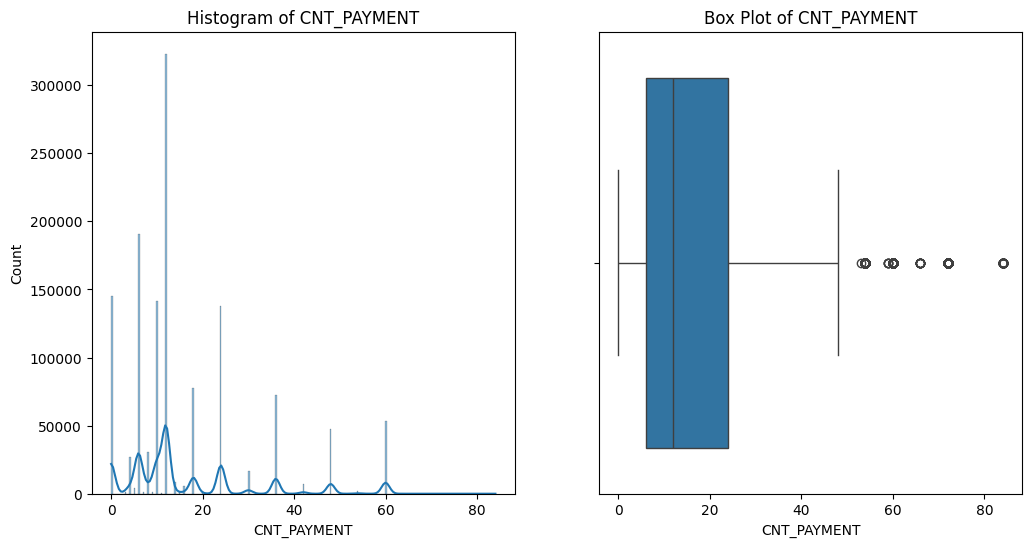

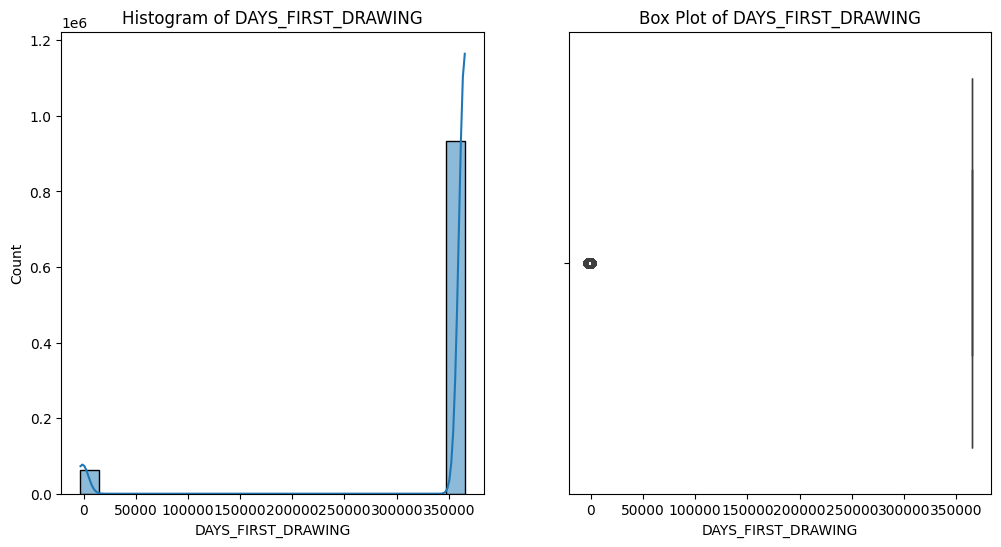

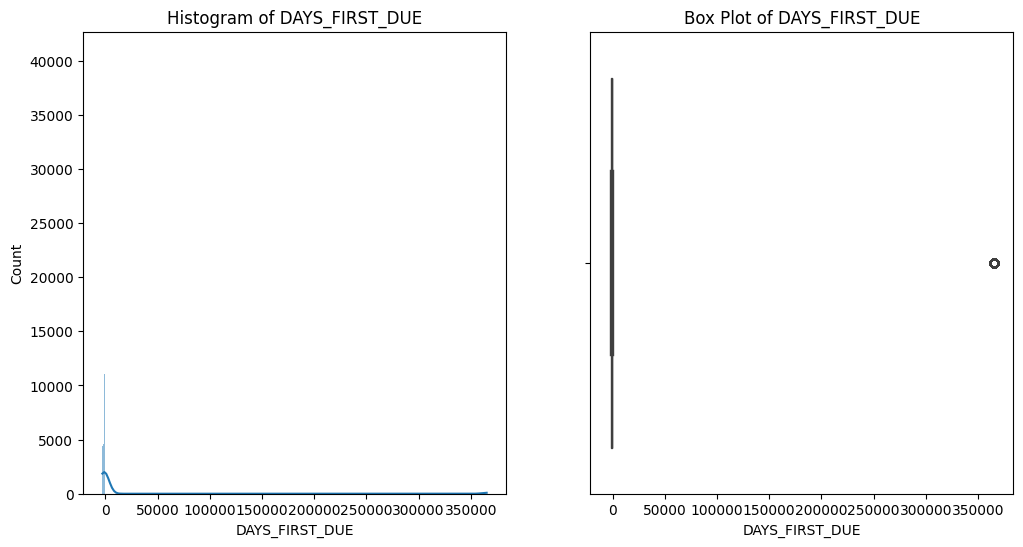

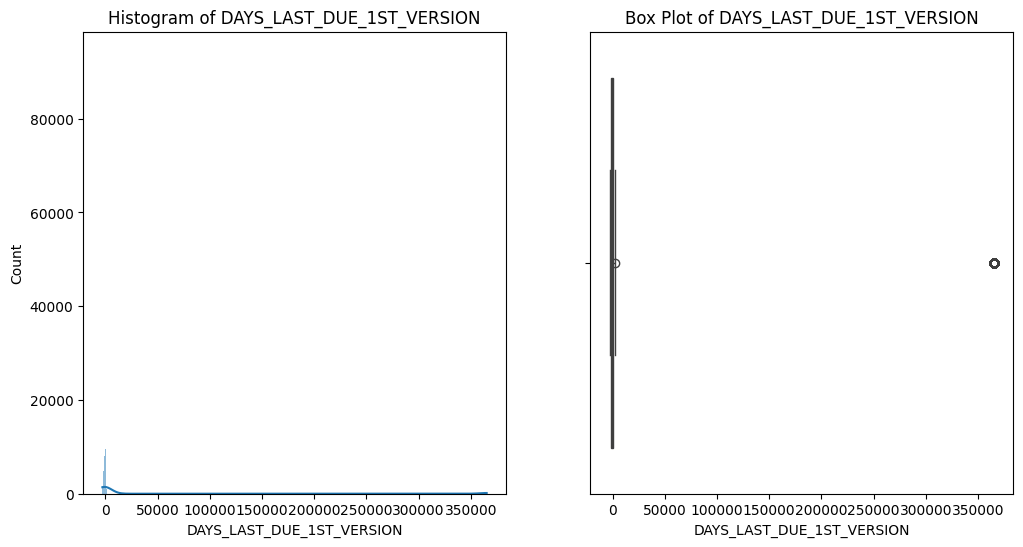

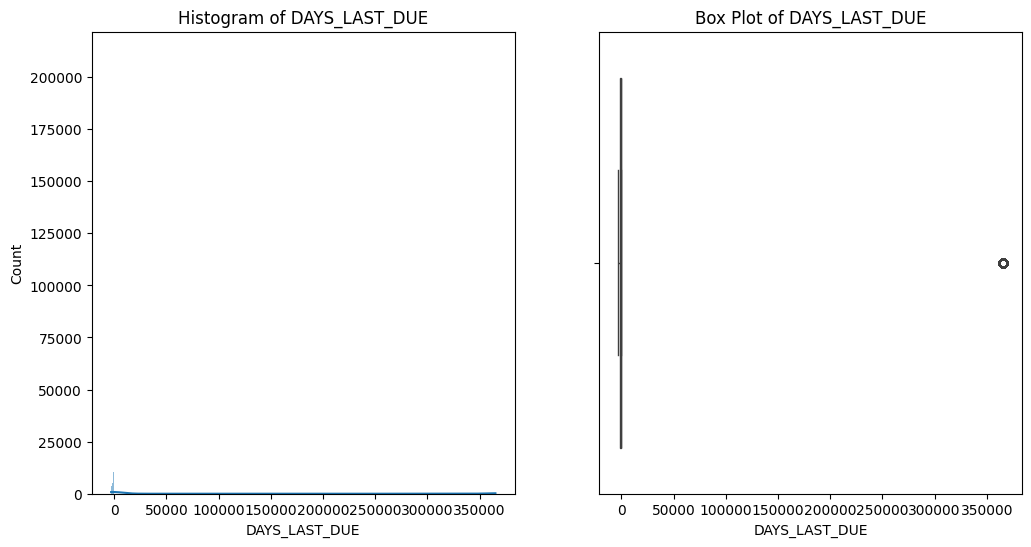

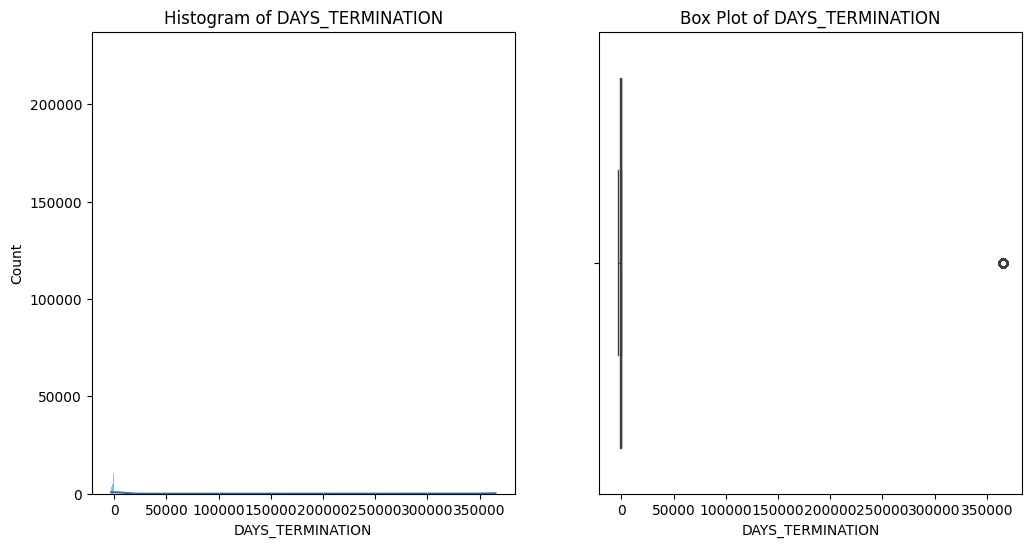

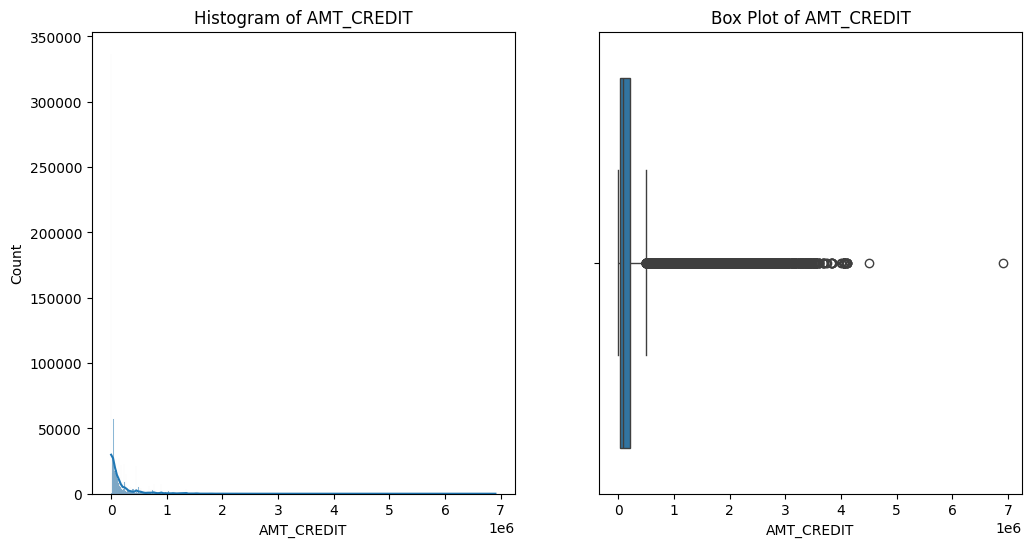

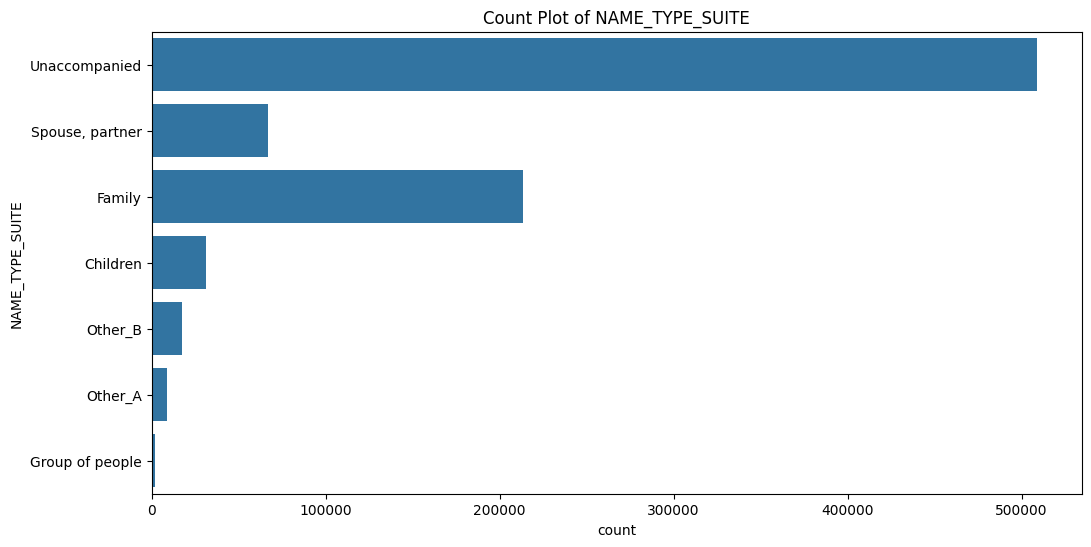

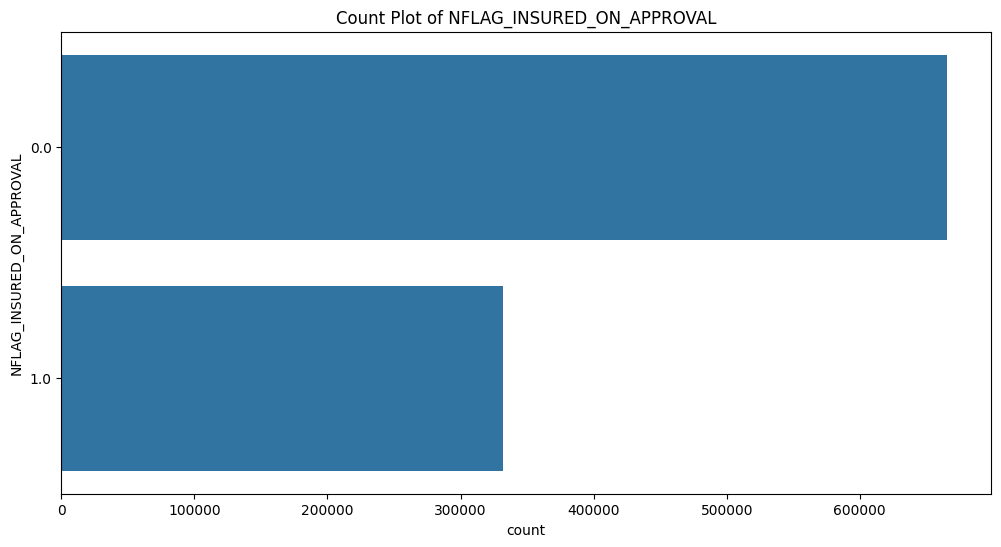

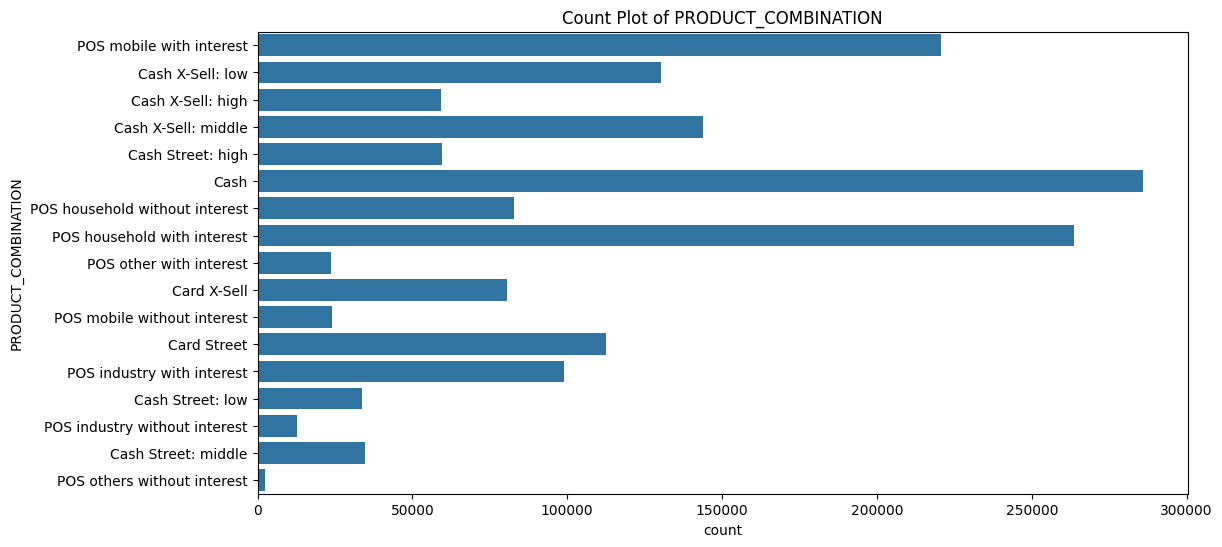

In [16]:
numerical_columns = ["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT", 
                     "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", 
                     "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", 
                     "DAYS_TERMINATION", "AMT_CREDIT"]


categorical_columns = ["NAME_TYPE_SUITE", "NFLAG_INSURED_ON_APPROVAL", "PRODUCT_COMBINATION"]


for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(previous_application[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=previous_application[column].dropna())
    plt.title(f'Box Plot of {column}')    
    plt.show()


for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=previous_application[column])
    plt.title(f'Count Plot of {column}')    
    plt.show()

### Explanation of Chosen Imputation Methods:

#### Mean for `AMT_ANNUITY`:
- **Reason**: 🧮 Mean is appropriate for normally distributed numerical data because it considers all values, giving a balanced estimate of central tendency.

#### Median for `AMT_GOODS_PRICE`, `CNT_PAYMENT`, `DAYS_FIRST_DRAWING`, `DAYS_FIRST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_LAST_DUE`, `DAYS_TERMINATION`, and `AMT_CREDIT`:
- **Reason**: 📈 Median is suitable for skewed numerical data as it is not affected by extreme values or outliers, providing a more robust measure of central tendency for such distributions.

#### Mode for `NAME_TYPE_SUITE`, `NFLAG_INSURED_ON_APPROVAL`, and `PRODUCT_COMBINATION`:
- **Reason**: 🗂️ Mode is suitable for categorical data because it identifies the most frequently occurring category, which is a logical choice for filling in missing categorical values to maintain consistency with the majority of the data.


In [13]:
mean_amt_annuity = previous_application['AMT_ANNUITY'].mean()
median_amt_goods_price = previous_application['AMT_GOODS_PRICE'].median()
median_cnt_payment = previous_application['CNT_PAYMENT'].median()
median_days_first_drawing = previous_application['DAYS_FIRST_DRAWING'].median()
median_days_first_due = previous_application['DAYS_FIRST_DUE'].median()
median_days_last_due_1st_version = previous_application['DAYS_LAST_DUE_1ST_VERSION'].median()
median_days_last_due = previous_application['DAYS_LAST_DUE'].median()
median_days_termination = previous_application['DAYS_TERMINATION'].median()
median_amt_credit = previous_application['AMT_CREDIT'].median()
mode_name_type_suite = previous_application['NAME_TYPE_SUITE'].mode()[0]
mode_nflag_insured_on_approval = previous_application['NFLAG_INSURED_ON_APPROVAL'].mode()[0]
mode_product_combination = previous_application['PRODUCT_COMBINATION'].mode()[0]

In [15]:
imputation_df = pd.DataFrame({
    "Column": ["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT", "DAYS_FIRST_DRAWING", 
               "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", 
               "DAYS_TERMINATION", "AMT_CREDIT", "NAME_TYPE_SUITE", 
               "NFLAG_INSURED_ON_APPROVAL", "PRODUCT_COMBINATION"],
    "Imputation Method": ["Mean", "Median", "Median", "Median", "Median", "Median", 
                          "Median", "Median", "Median", "Mode", "Mode", "Mode"],
    "Imputation Value": [mean_amt_annuity, median_amt_goods_price, median_cnt_payment, 
                         median_days_first_drawing, median_days_first_due, 
                         median_days_last_due_1st_version, median_days_last_due, 
                         median_days_termination, median_amt_credit, mode_name_type_suite, 
                         mode_nflag_insured_on_approval, mode_product_combination]
})
imputation_df

,Column,Imputation Method,Imputation Value
0,AMT_ANNUITY,Mean,15955.120659
1,AMT_GOODS_PRICE,Median,112320.0
2,CNT_PAYMENT,Median,12.0
3,DAYS_FIRST_DRAWING,Median,365243.0
4,DAYS_FIRST_DUE,Median,-831.0
5,DAYS_LAST_DUE_1ST_VERSION,Median,-361.0
6,DAYS_LAST_DUE,Median,-537.0
7,DAYS_TERMINATION,Median,-499.0
8,AMT_CREDIT,Median,80541.0
9,NAME_TYPE_SUITE,Mode,Unaccompanied


## Splitting of Columns to Numerical and Categorical

In [19]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in previous_application.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR', 'TARGET']]


print('Categorical Columns:\n')
for column in obj_dtypes:
    print(column)


print('\nNumerical Columns:\n')
for column in num_dtypes:
    print(column)


Categorical Columns:

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION

Numerical Columns:

SK_ID_PREV
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_GOODS_PRICE
HOUR_APPR_PROCESS_START
NFLAG_LAST_APPL_IN_DAY
DAYS_DECISION
SELLERPLACE_AREA
CNT_PAYMENT
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


## % of Missing Data in application_Data

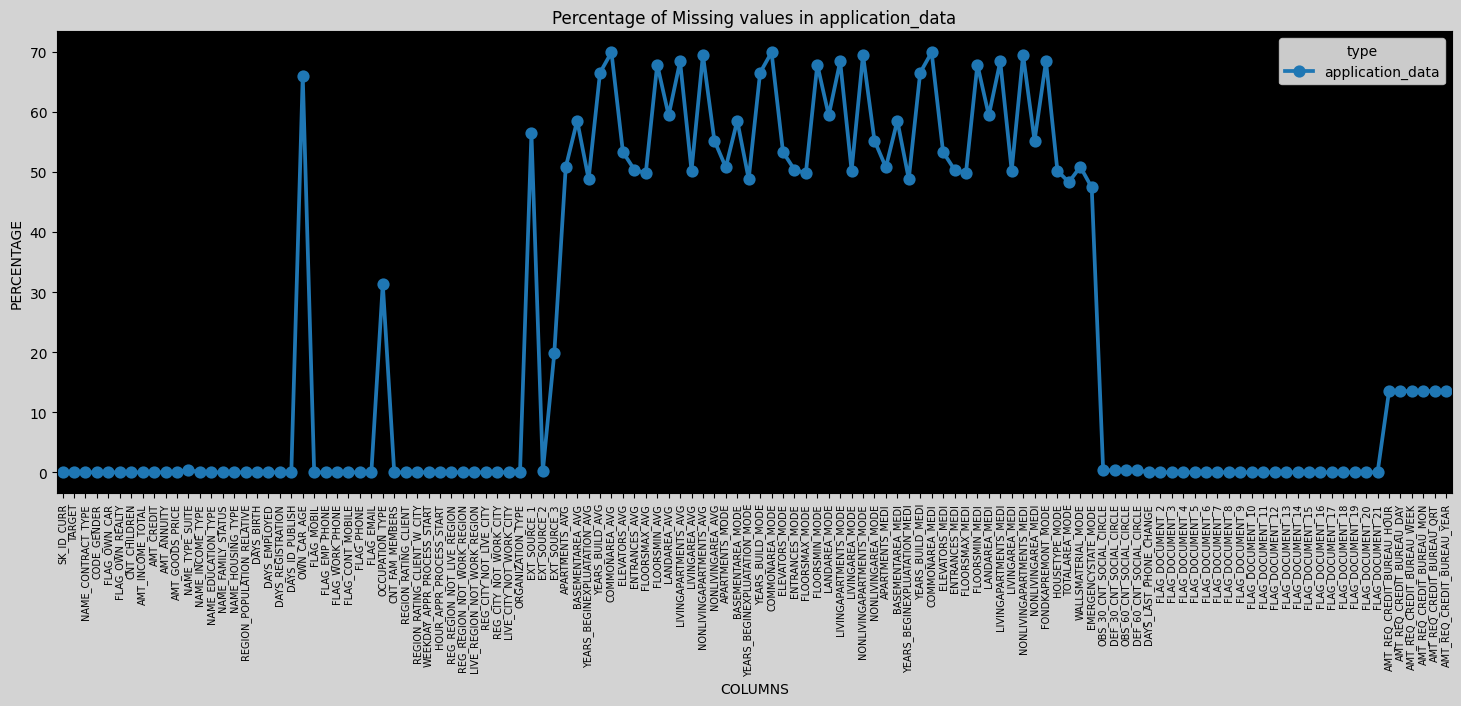

In [21]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot(x="index", y=0, data=miss_application_data, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [20]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00 
TARGET                          0.00 
NAME_CONTRACT_TYPE              0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT                      0.00 
AMT_ANNUITY                     0.00 
AMT_GOODS_PRICE                 0.09 
NAME_TYPE_SUITE                 0.42 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
OWN_CAR_AGE                     65.99
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE  

In [22]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

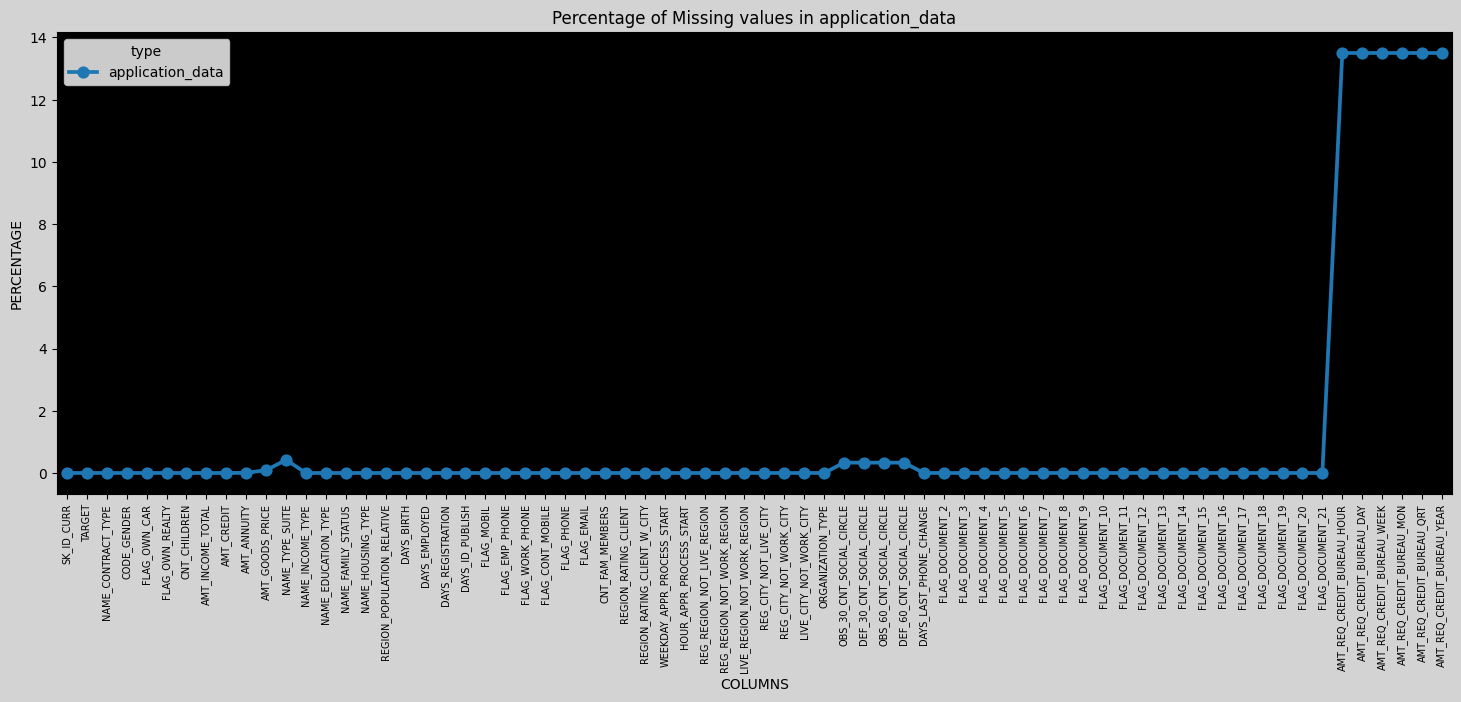

In [23]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot(x="index", y=0, data=miss_application_data, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")


In [24]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.00 
TARGET                         0.00 
NAME_CONTRACT_TYPE             0.00 
CODE_GENDER                    0.00 
FLAG_OWN_CAR                   0.00 
FLAG_OWN_REALTY                0.00 
CNT_CHILDREN                   0.00 
AMT_INCOME_TOTAL               0.00 
AMT_CREDIT                     0.00 
AMT_ANNUITY                    0.00 
AMT_GOODS_PRICE                0.09 
NAME_TYPE_SUITE                0.42 
NAME_INCOME_TYPE               0.00 
NAME_EDUCATION_TYPE            0.00 
NAME_FAMILY_STATUS             0.00 
NAME_HOUSING_TYPE              0.00 
REGION_POPULATION_RELATIVE     0.00 
DAYS_BIRTH                     0.00 
DAYS_EMPLOYED                  0.00 
DAYS_REGISTRATION              0.00 
DAYS_ID_PUBLISH                0.00 
FLAG_MOBIL                     0.00 
FLAG_EMP_PHONE                 0.00 
FLAG_WORK_PHONE                0.00 
FLAG_CONT_MOBILE               0.00 
FLAG_PHONE                     0.00 
FLAG_EMAIL                     0.00 
C

### Explanation of Chosen Imputation Methods:

#### Mean for `AMT_ANNUITY` and `AMT_GOODS_PRICE`:
- **Reason**: 🧮 Mean is appropriate for normally distributed numerical data because it considers all values, giving a balanced estimate of central tendency.

#### Median for `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_YEAR`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`, and `CNT_FAM_MEMBERS`:
- **Reason**: 📈 Median is suitable for skewed numerical data as it is not affected by extreme values or outliers, providing a more robust measure of central tendency for such distributions.

#### Mode for `NAME_TYPE_SUITE` and `DAYS_LAST_PHONE_CHANGE`:
- **Reason**: 🗂️ Mode is suitable for categorical data because it identifies the most frequently occurring category, which is a logical choice for filling in missing categorical values to maintain consistency with the majority of the data.


In [25]:
mean_amt_annuity = application_data['AMT_ANNUITY'].mean()
mean_amt_goods_price = application_data['AMT_GOODS_PRICE'].mean()

median_amt_req_credit_bureau_day = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()
median_amt_req_credit_bureau_hour = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
median_amt_req_credit_bureau_mon = application_data['AMT_REQ_CREDIT_BUREAU_MON'].median()
median_amt_req_credit_bureau_qrt = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()
median_amt_req_credit_bureau_week = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
median_amt_req_credit_bureau_year = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
median_def_30_cnt_social_circle = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()
median_obs_60_cnt_social_circle = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()
median_def_60_cnt_social_circle = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median()
median_cnt_fam_members = application_data['CNT_FAM_MEMBERS'].median()

mode_name_type_suite = application_data['NAME_TYPE_SUITE'].mode()[0]
mode_days_last_phone_change = application_data['DAYS_LAST_PHONE_CHANGE'].mode()[0]


imputation_df = pd.DataFrame({
    "Column": ["AMT_ANNUITY", "AMT_GOODS_PRICE",
               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_MON",
               "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_YEAR",
               "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
               "CNT_FAM_MEMBERS", "NAME_TYPE_SUITE", "DAYS_LAST_PHONE_CHANGE"],
    "Imputation Method": ["Mean", "Mean",
                          "Median", "Median", "Median", "Median",
                          "Median", "Median", "Median", "Median", "Median",
                          "Median", "Mode", "Mode"],
    "Imputation Value": [mean_amt_annuity, mean_amt_goods_price,
                         median_amt_req_credit_bureau_day, median_amt_req_credit_bureau_hour,
                         median_amt_req_credit_bureau_mon, median_amt_req_credit_bureau_qrt,
                         median_amt_req_credit_bureau_week, median_amt_req_credit_bureau_year,
                         median_def_30_cnt_social_circle, median_obs_60_cnt_social_circle,
                         median_def_60_cnt_social_circle, median_cnt_fam_members,
                         mode_name_type_suite, mode_days_last_phone_change]
})

print(imputation_df)


                        Column Imputation Method Imputation Value
0   AMT_ANNUITY                 Mean              27108.573909   
1   AMT_GOODS_PRICE             Mean              538396.207429  
2   AMT_REQ_CREDIT_BUREAU_DAY   Median            0.0            
3   AMT_REQ_CREDIT_BUREAU_HOUR  Median            0.0            
4   AMT_REQ_CREDIT_BUREAU_MON   Median            0.0            
5   AMT_REQ_CREDIT_BUREAU_QRT   Median            0.0            
6   AMT_REQ_CREDIT_BUREAU_WEEK  Median            0.0            
7   AMT_REQ_CREDIT_BUREAU_YEAR  Median            1.0            
8   DEF_30_CNT_SOCIAL_CIRCLE    Median            0.0            
9   OBS_60_CNT_SOCIAL_CIRCLE    Median            0.0            
10  DEF_60_CNT_SOCIAL_CIRCLE    Median            0.0            
11  CNT_FAM_MEMBERS             Median            2.0            
12  NAME_TYPE_SUITE             Mode              Unaccompanied  
13  DAYS_LAST_PHONE_CHANGE      Mode              0.0            


## Converting -ve Values to Absolute Values

In [26]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

## Separating numerical and categorical in application_data

In [27]:
obj_dtypes = [i for i in application_data.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in application_data.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR', 'TARGET']]


print('Categorical Columns:\n')
for column in obj_dtypes:
    print(column)


print('\nNumerical Columns:\n')
for column in num_dtypes:
    print(column)

Categorical Columns:

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE

Numerical Columns:

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
